In [53]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [54]:
# Load the dataset
data = pd.read_csv('datasetnew.csv')

# Define feature columns
features = ['Species','Plant_Height', 'No._of_leaves_in_a_cluster',
            'Length_Width_LeafRatio','Average_angle_of_leaf_divergence_from_vertical']

# Drop unnecessary columns
data = data.drop('Leaf height', axis=1)
data = data.drop('Leaf Width', axis=1)

# Replace missing values with zeros
data_filled = data.fillna(0)

In [55]:
features_data = data_filled.drop('Species', axis=1)
labels = data_filled['Species'].to_numpy()

# Encode labels
encoder = OneHotEncoder(sparse=False)
labels_encoded = encoder.fit_transform(labels.reshape(-1, 1))

# Normalize features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features_data)

# Get unique labels after encoding
unique_labels = np.unique(labels)

# Print unique labels
print("Unique Labels:")
for label in unique_labels:
    print(label)




Unique Labels:
Dracaena Trifasciata
Sanseveria Liberica
Sansevieria trifasciata Hahnii


In [56]:
# Load the saved model
model = load_model('final_model.h5')

In [61]:
# Function to replace missing values with column averages
def replace_missing_with_average(data):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include='number')
    
    # Calculate the average value of each column
    column_averages = numeric_data.mean()
    
    # Replace missing values with column averages
    data_filled = data.fillna(column_averages)
    
    return data_filled

# Replace missing values with column averages
data_filled = replace_missing_with_average(data)

# Check for missing values after replacement
print(data_filled.isnull().sum())

features_data = data_filled.drop('Species', axis=1)
labels = data_filled['Species'].to_numpy()

# Encode labels
encoder = OneHotEncoder(sparse=False)
labels_encoded = encoder.fit_transform(labels.reshape(-1, 1))

# Normalize features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features_data)

# Get unique labels after encoding
unique_labels = np.unique(labels)

# Print unique labels
print("Unique Labels:")
for label in unique_labels:
    print(label)


Species                                            0
Plant height                                       0
No. of leaves in a cluster                         0
Leaf length width ratio                            0
Average angle of leaf divergence from vertical.    0
dtype: int64
Unique Labels:
Dracaena Trifasciata
Sanseveria Liberica
Sansevieria trifasciata Hahnii


In [62]:
# Make predictions on the features data
predictions = model.predict(features_normalized)

# Iterate over the first 10 samples
for i in range(10):
    # Get the predicted class index with the highest probability
    predicted_class_index = np.argmax(predictions[i])
    
    # Get the predicted probability for the predicted class
    predicted_probability = predictions[i][predicted_class_index]
    
    # Get the predicted class name
    predicted_class_name = unique_labels[predicted_class_index]
    
    # Get the actual class name
    actual_class_name = labels[i]
    
    # Print the results
    print(f"Sample {i+1}:")
    print(f"Predicted Class: {predicted_class_name}")
    print(f"Predicted Probability: {predicted_probability:.4f}")
    print(f"Actual Class: {actual_class_name}")
    print()

4/4 [==============================] - 0s 8ms/step
Sample 1:
Predicted Class: Sansevieria trifasciata Hahnii
Predicted Probability: 0.9992
Actual Class: Sansevieria trifasciata Hahnii

Sample 2:
Predicted Class: Sansevieria trifasciata Hahnii
Predicted Probability: 0.9987
Actual Class: Sansevieria trifasciata Hahnii

Sample 3:
Predicted Class: Sansevieria trifasciata Hahnii
Predicted Probability: 0.9981
Actual Class: Sansevieria trifasciata Hahnii

Sample 4:
Predicted Class: Sansevieria trifasciata Hahnii
Predicted Probability: 0.9992
Actual Class: Sansevieria trifasciata Hahnii

Sample 5:
Predicted Class: Sansevieria trifasciata Hahnii
Predicted Probability: 0.9817
Actual Class: Sansevieria trifasciata Hahnii

Sample 6:
Predicted Class: Sansevieria trifasciata Hahnii
Predicted Probability: 0.9893
Actual Class: Sansevieria trifasciata Hahnii

Sample 7:
Predicted Class: Sansevieria trifasciata Hahnii
Predicted Probability: 0.9796
Actual Class: Sansevieria trifasciata Hahnii

Sample 8:
P

In [63]:
# Display some correctly and incorrectly classified examples
correctly_classified = []
incorrectly_classified = []

# Compare predicted classes with actual classes
for i in range(len(predictions)):
    predicted_class_index = np.argmax(predictions[i])
    predicted_class_name = unique_labels[predicted_class_index]
    actual_class_name = labels[i]
    
    if predicted_class_name == actual_class_name:
        correctly_classified.append(i)
    else:
        incorrectly_classified.append(i)

# Display some correctly classified examples
print("Correctly Classified Examples:")
for i in correctly_classified[:5]:
    print(f"Sample {i+1}: Predicted Class: {unique_labels[np.argmax(predictions[i])]}, Actual Class: {labels[i]}")

# Display some incorrectly classified examples
print("\nIncorrectly Classified Examples:")
for i in incorrectly_classified[:5]:
    print(f"Sample {i+1}: Predicted Class: {unique_labels[np.argmax(predictions[i])]}, Actual Class: {labels[i]}")

Correctly Classified Examples:
Sample 1: Predicted Class: Sansevieria trifasciata Hahnii, Actual Class: Sansevieria trifasciata Hahnii
Sample 2: Predicted Class: Sansevieria trifasciata Hahnii, Actual Class: Sansevieria trifasciata Hahnii
Sample 3: Predicted Class: Sansevieria trifasciata Hahnii, Actual Class: Sansevieria trifasciata Hahnii
Sample 4: Predicted Class: Sansevieria trifasciata Hahnii, Actual Class: Sansevieria trifasciata Hahnii
Sample 5: Predicted Class: Sansevieria trifasciata Hahnii, Actual Class: Sansevieria trifasciata Hahnii

Incorrectly Classified Examples:
Sample 52: Predicted Class: Sanseveria Liberica, Actual Class: Dracaena Trifasciata
Sample 76: Predicted Class: Sanseveria Liberica, Actual Class: Dracaena Trifasciata
Sample 78: Predicted Class: Sanseveria Liberica, Actual Class: Dracaena Trifasciata


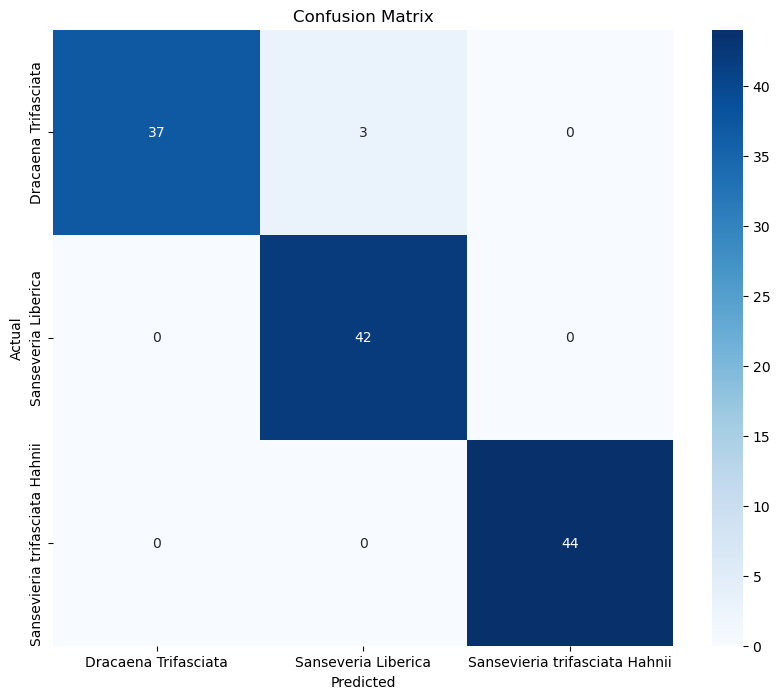

In [64]:
# Generate confusion matrix
# Convert predicted classes to string labels
predicted_class_names = [unique_labels[np.argmax(pred)] for pred in predictions]

# Generate confusion matrix
cm = confusion_matrix(labels, predicted_class_names, labels=unique_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()